# Toyota Innovation Challenge Machine Vision Competition (Python + OpenCV)

Solution developed by: Eshaan Mehta, Darius Rudaitis, Jesus Cova, Hazem Saad




## 1. Mounting Google Drive to Save Files <a name="mountGoogleDrive"></a>

First, run the cell below to mount Google Drive so that we can save any files captured in this notebook there. Click 'Connect to Google Drive', select your Google Account and then click 'Allow'. This will mount your Google Drive at path '/content/gdrive'.

In [ ]:
from google.colab import drive, files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2. Importing Relevant Libraries and Downloading Sample Images <a name="importLibs"></a>

Now we'll import some relevant libraries to help us perform image processing tasks.

In [ ]:
# import dependencies
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import display, Javascript, Image

from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

#Get Python and OpenCV Version

print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

OpenCV-Python Lib Version: 4.7.0
Python Version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
--2023-05-14 22:41:33--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70503 (69K) [image/jpeg]
Saving to: ‘noidea.jpg’

noidea.jpg          100%[===================>]  68.85K  --.-KB/s    in 0.002s  

2023-05-14 22:41:33 (42.1 MB/s) - ‘noidea.jpg’ saved [70503/70503]

--2023-05-14 22:41:33--  https://raw.githubusercontent.com/MeAmarP/sample_imgs/master/wiki_shapes.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.1

## 3. I/O: Read, Show, Write Images <a name="Basicio"></a>
+ Binary: 2D Array of pixels, where pixel value is either 0 or 255.

## 3. Basic Operations: <a name="Basicops"></a>

### Convert: <a name="conv"></a>

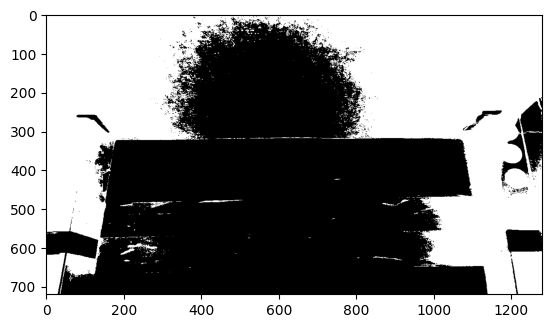

In [ ]:
#Convert to Gray
img_gry = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2GRAY)

#Convert to Binary
# Method: Basic Thresholding
ret,img_bin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY)
ret,img_bininv = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY_INV)

# Method: Adaptive Thresholding
img_adp_gusbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,5)
img_adp_meanbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,5)

# Method: Otsu's Thresholding
ret,img_Otsubin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img_Otsubin,cmap='binary')

### Convert Colorspaces: <a name="clsp"></a>

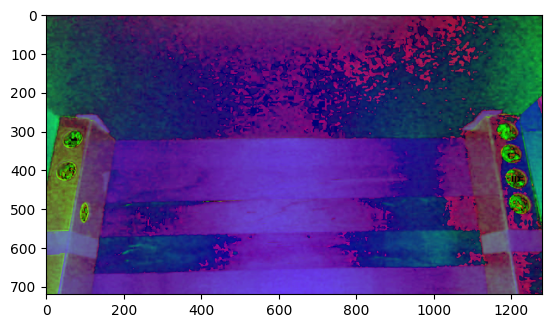

In [ ]:
#Changing Color Spaces
img_hls = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2HLS)
img_hsv = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2LAB)
img_yuv = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2YUV)
plt.imshow(img_hsv)

### Challenge 1: Still Images<a name="color-detect"></a>

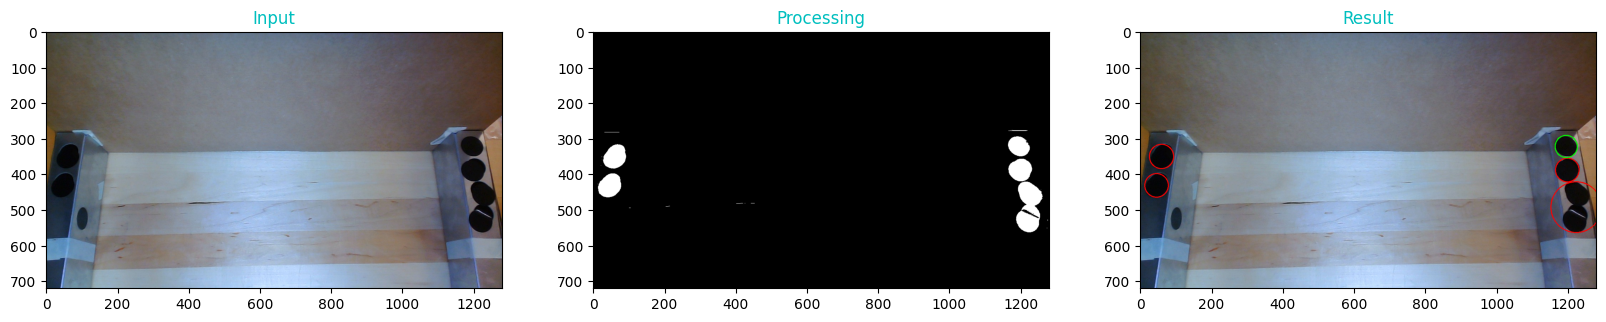

In [ ]:
def detectColorObjects(path_to_img):
    img =cv2.imread(path_to_img)
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    BlackUpper = np.array([255,255,30])
    BlackLower = np.array([0,0,0])
    img_mask = cv2.inRange(img_hsv,BlackLower,BlackUpper)

    #cv2.bitwise_and(img,img,mask=img_mask)
    return img, img_mask


def markDetectedObjects(og_img,masked_img, minHrad = 24, minSrad = 29, maxSrad = 34, minHarea = 1600, minSarea = 2400, maxSarea = 3000):
    minHoleRadius = minHrad
    minStickerRadius = minSrad
    maxStickerRadius = maxSrad

    #values determined on metal1.jpg and metal6.jpg
    minHoleArea = minHarea
    minStickerArea = minSarea
    maxStickerArea = maxSarea
    epsilon = 6

    # Find Contours
    (contours,_)=cv2.findContours(masked_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    FinImg = og_img.copy()
    for contour in contours:
        area = cv2.contourArea(contour)

        #only considering circle larger than minimum size
        if(area > minHoleArea):
            x,y,w,h = cv2.boundingRect(contour)
            radius = max(w, h) // 2

            #Sticker
            if (radius >= minStickerRadius and radius <= maxStickerRadius) and abs(w - h) <= epsilon and (area >= minStickerArea and area <= maxStickerArea):
              cv2.circle(FinImg, (int(x + w/2), int(y + h/2)), radius, (0, 255, 0), 2)
            
            #Hole
            elif radius  >= minHoleRadius:
              cv2.circle(FinImg, (int(x + w/2), int(y + h/2)), radius, (0, 0, 255), 2)            

            BaseCord = np.array([x+h+round(w/2), y+h+round(w/2)])
    plt.figure(figsize=(20,10))
    plt.subplot(131),plt.imshow(cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(132),plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB)),plt.title('Processing',color='c')
    plt.subplot(133),plt.imshow(cv2.cvtColor(FinImg,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.show()
    return


path_to_img = 'Training Images/Metal_4.jpg'
img,maskedImg =detectColorObjects(path_to_img)
markDetectedObjects(img,maskedImg)

<br>
Now we'll see how we can connect to the Orbecc Astra camera and capture images and record videos in real-time.

## JS -> CV2 Helper Function **Important**<a name="camera-image-capture"></a>
Using a webcam to capture images for processing on the runtime. If you have the Orbecc Astra camera plugged in for this, it will be used. Otherwise, your computer's internal webcam will be used.

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

## Challenge 2,3: Still Camera Live Feed <a name="realtime-processing-face-detection"></a>
Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (in this example, face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream. You can do something similar for your hackathon solution.



In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
def convertImgToBinary(img):
  #convert input image to hsv
  img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  
  #upper and lower bounds for range of acceptable black color
  BlackUpper = np.array([255,255,30])
  BlackLower = np.array([0,0,0])

  #creating a inverted binary img to classify all black regions in original image
  img_mask = cv2.inRange(img_hsv,BlackLower,BlackUpper)
    
  return img_mask


def findCircles(masked_img, minHrad = 24, minSrad = 29, maxSrad = 34, minHarea = 1600, minSarea = 2400, maxSarea = 3000, maxCarea = 5000):
    #parameters for algortihm
    #can be tweaked and fine tuned to different situations
    #if depth perception is available, these can be calculated depending on z value
    minHoleRadius = minHrad
    minStickerRadius = minSrad
    maxStickerRadius = maxSrad
    minHoleArea = minHarea
    minStickerArea = minSarea
    maxStickerArea = maxSarea
    maxCircleArea = maxCarea

    #margin of error of width 
    epsilon = 6

    #initialize array of all found circles in a frame
    circle_coords = []

    # Find Contours
    (contours,_)=cv2.findContours(masked_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    #check each contour for validity
    for contour in contours:
        #calculate area for each contour
        area = cv2.contourArea(contour)

        #only considering circle within size contstraints
        if(area > minHoleArea and area < maxCircleArea):
            x,y,w,h = cv2.boundingRect(contour)
            radius = max(w, h) // 2

            #Sticker calculations
            if (radius >= minStickerRadius and radius <= maxStickerRadius) and abs(w - h) <= epsilon and (area >= minStickerArea and area <= maxStickerArea):
              circle_coords.append([int(x +w/2), int(y + h/2), radius, True])

            #Hole calculations
            elif radius > minHoleRadius:
              circle_coords.append([int(x +w/2), int(y + h/2), radius, False])

    return circle_coords




In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    #obtain binary version of frame and all circles
    masked_img = convertImgToBinary(img)
    coords = findCircles(masked_img, minHrad = 8, minSrad = 14, minHarea=100, minSarea = 400, maxCarea = 5000)

    # get face bounding box for overlay
    for circle in coords:
      #calculate center of circle
      center = (circle[0], circle[1])

      #determine color of overlay circle depending if on red of green
      color = (0, 255, 0) if circle[3] else (255, 0, 0)
      
      #create circle for overlay
      bbox_array = cv2.circle(img, center, circle[2], color, 2)
    
    #create bbox overlay
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGB')
    iobuf = io.BytesIO()

    #format bbox into png for return
    bbox_PIL.save(iobuf, format = 'png')

    #format return string
    bbox_bytes = 'data:image/img;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))


    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>